In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

We again have the same kind of header as before. This time we additionally import the [`scipy` library](https://scipy.org/). `scipy` extends `numpy` with lots of useful algorithms for scientific computing and statistics. In this tutorial we'll use it for performing linear regression.

# Linear regression

We can import the same data as in the previous notebook.

In [2]:
time, conc, cover = np.loadtxt('data_1.csv',skiprows=1,delimiter=',',unpack=True)

Let's first plot the concentration dataset, as a reminder:

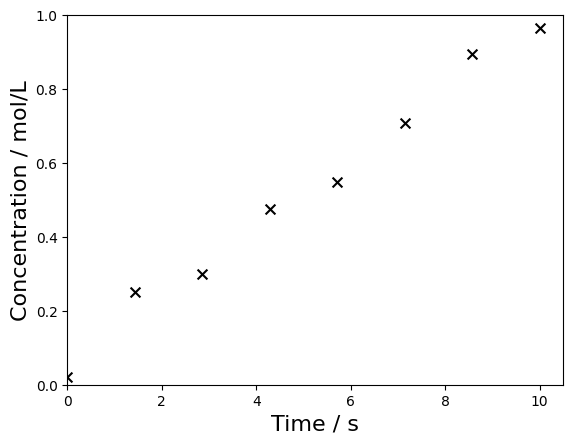

In [3]:
# This command defines large black crosses as symbols
plt.scatter(time,conc,marker='x',color='black',s=50)

# Now for the axis labels
plt.xlabel('Time / s',fontsize=16)
plt.ylabel('Concentration / mol/L',fontsize=16)

# We can also adjust the range of the plot. 
# For example, it's generally good practice to start a plot at 0, if the numbers cannot be negative anyways
plt.xlim([0,10.5])
plt.ylim([0,1])

plt.show()

Visually, the concentration seems to linearly increase with time. To quantify the rate of increase, we can fit a line to the data:

$$
c(t) = m \cdot t + b
$$

Here, the function $c(t)$ describes the concentration over time and $m$ and $b$ are parameters describing the rate of increase $m$ and the intercept $b$ (concentration at $t=0$).

A common way to determine the optimal values of $m$ and $b$ is the so called *least squares* method. This means that we define a loss function $\mathcal{L}(m,b)$ that measures how good a given set of parameters $(m,b)$ fits to the data:

$$
\mathcal{L}(m,b) = \sum_t^{N_\mathrm{data}} \left[ c_t^\mathrm{ref} - (m \cdot t + b)  \right]^2
$$

Let's go over this equation step by step: We are summing over all $N_\mathrm{data}$ time points $t$ in the dataset. For each datapoint we have a measured concentration value $c_t^\mathrm{ref}$ from which we subtract the predicted value $m \cdot t + b$. In other words, the squared brackets contain the difference (also called the residual) between the target values and our prediction. This difference is squared (can you guess why?). 

The values of $m$ and $b$ which minimize $\mathcal{L}$ are called the *least squares* estimate, because they have the smallest squared difference between predictions and data. We can get this estimate with the `linregress` method in `scipy`:

In [4]:
results = sp.stats.linregress(time,conc)
print(results.slope,results.intercept)

0.09288626509438146 0.05565190976776463


Now let's make a plot to see how well this linear regression worked:

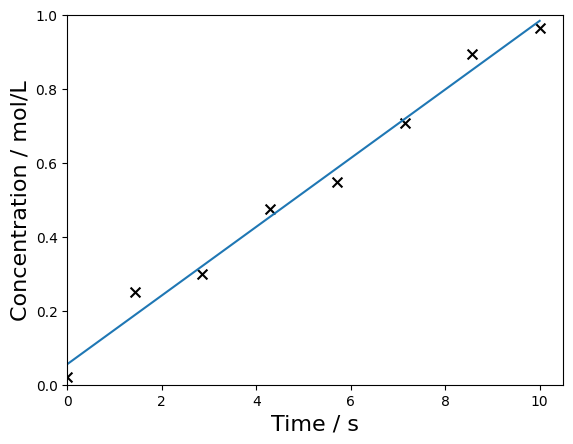

In [5]:
# To plot this function we use a numpy convenience function called linspace:
time_regress = np.linspace(0,10,101)
conc_regress = results.slope*time_regress + results.intercept

# This command defines large black crosses as symbols
plt.scatter(time,conc,marker='x',color='black',s=50)

# Here we plot the function as a lineplot:
plt.plot(time_regress,conc_regress)

# Now for the axis labels
plt.xlabel('Time / s',fontsize=16)
plt.ylabel('Concentration / mol/L',fontsize=16)

# We can also adjust the range of the plot. 
# For example, it's generally good practice to start a plot at 0, if the numbers cannot be negative anyways
plt.xlim([0,10.5])
plt.ylim([0,1])

plt.show()

We can try the same thing for the second dataset (time vs. coverage):

In [6]:
results = sp.stats.linregress(time,cover)
print(results.slope,results.intercept)

-8.685008534191434 82.7925428417058


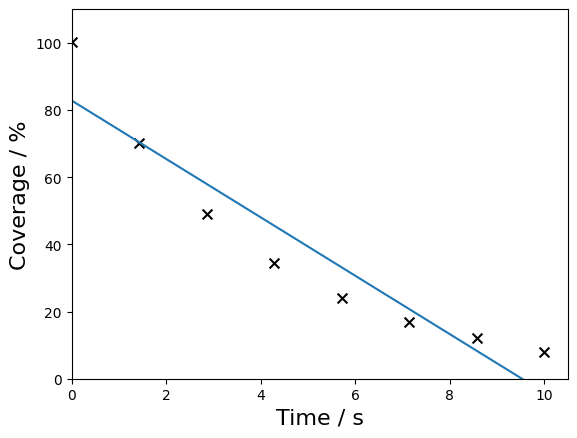

In [7]:
time_regress = np.linspace(0,10,101)
cover_regress = results.slope*time_regress + results.intercept

# This command defines large black crosses as symbols
plt.scatter(time,cover,marker='x',color='black',s=50)

# Here we plot the function as a lineplot:
plt.plot(time_regress,cover_regress)

# Now for the axis labels
plt.xlabel('Time / s',fontsize=16)
plt.ylabel('Coverage / %',fontsize=16)

# We can also adjust the range of the plot. 
# For example, it's generally good practice to start a plot at 0, if the numbers cannot be negative anyways
plt.xlim([0,10.5])
plt.ylim([0,110])

plt.show()

This fit is much less satisfying than the previous one. Here, the relation between coverage and time is simply not linear. In the next tutorial, we will look at general non-linear regression methods. But as it turns out, linear regression can do much more than just fitting straight lines to data, so we don't have to give up just yet. With some experience, you can notice that the data looks like an exponential decay. If we plot the logarithm of the coverage instead, we recover a linear relation:

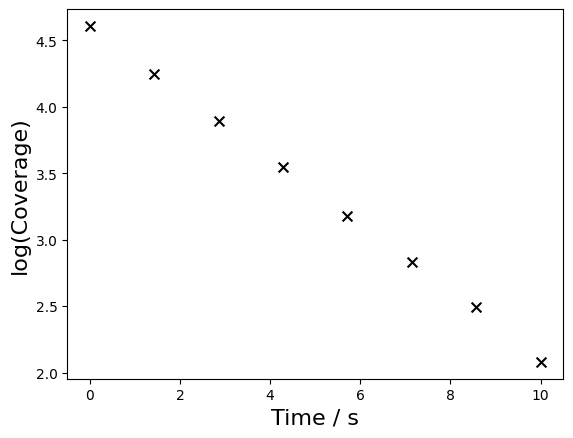

In [10]:
# This command defines large black crosses as symbols
plt.scatter(time,np.log(cover),marker='x',color='black',s=50)

# Now for the axis labels
plt.xlabel('Time / s',fontsize=16)
plt.ylabel('log(Coverage)',fontsize=16)

plt.show()

In [11]:
results = sp.stats.linregress(time,np.log(cover))
print(results.slope,results.intercept)

-0.25023386657188595 4.610329416063248


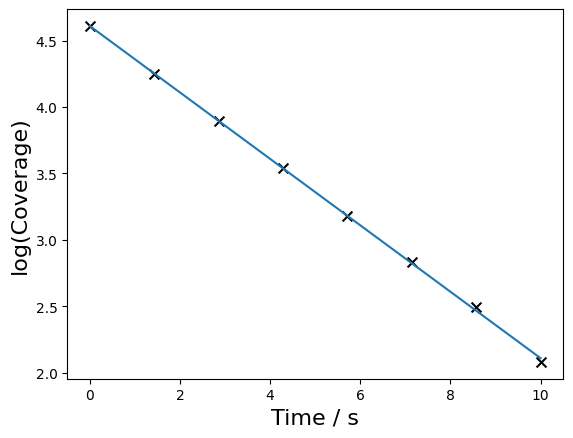

In [12]:
time_regress = np.linspace(0,10,101)
log_cover_regress = results.slope*time_regress + results.intercept

# This command defines large black crosses as symbols
plt.scatter(time,np.log(cover),marker='x',color='black',s=50)

# Here we plot the function as a lineplot:
plt.plot(time_regress,log_cover_regress)

# Now for the axis labels
plt.xlabel('Time / s',fontsize=16)
plt.ylabel('log(Coverage)',fontsize=16)

plt.show()

Finally, we can go back to the original scale by plotting the exponential of the linear fit we just produced:

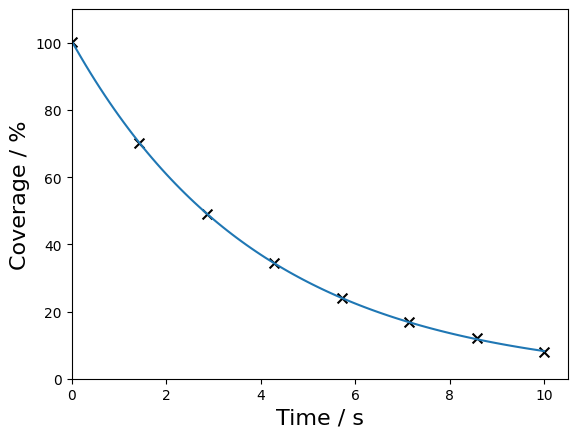

In [14]:
time_regress = np.linspace(0,10,101)
log_cover_regress = results.slope*time_regress + results.intercept

# This command defines large black crosses as symbols
plt.scatter(time,cover,marker='x',color='black',s=50)

# Here we plot the function as a lineplot:
plt.plot(time_regress,np.exp(log_cover_regress))

# Now for the axis labels
plt.xlabel('Time / s',fontsize=16)
plt.ylabel('Coverage / %',fontsize=16)

# We can also adjust the range of the plot. 
# For example, it's generally good practice to start a plot at 0, if the numbers cannot be negative anyways
plt.xlim([0,10.5])
plt.ylim([0,110])

plt.show()

This proofs that we can also fit non-linear relationships with linear regression. The key idea is to use a non-linear transformation of the data before doing the fit. 